In [1]:
# pandas es una librería para trabajar con los datos de un archivo
import pandas as pd

datos = pd.read_csv('housing.csv')

In [2]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# ocean_proximity contiene datos de texto, no numéricos,
# habrá que tranformar los datos en numéricos.
datos['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [4]:
# Comprobamos que todos los campos son tipo float a excepción
# de ocean_proximity que es object.
# Podemos ver que total_bedrooms tiene alrededor de 200 campos
# vacíos y no pueden estarlo.
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Ofrece datos sobre los registros
datos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

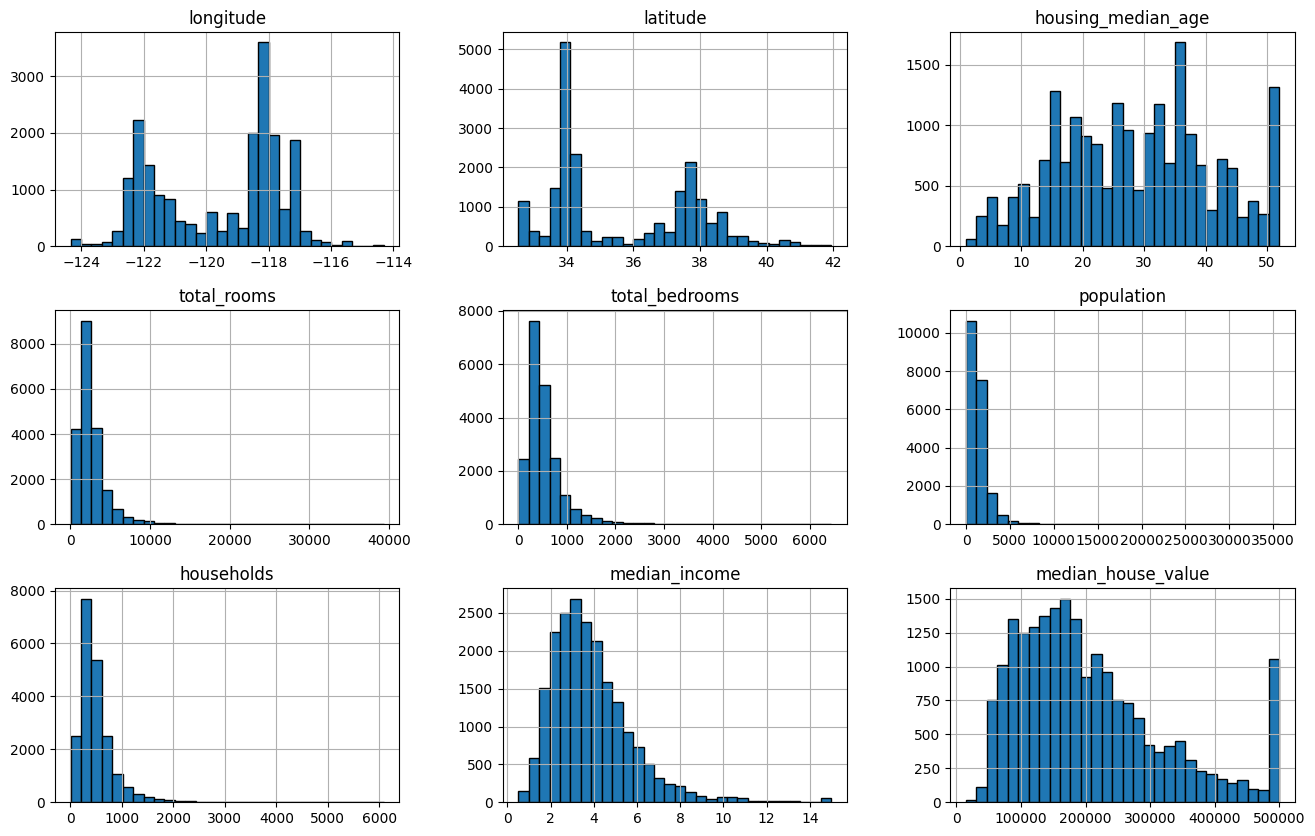

In [6]:
# Gráficos
# Histograma
datos.hist(figsize=(16,10), bins=30, edgecolor="black")

<Axes: xlabel='latitude', ylabel='longitude'>

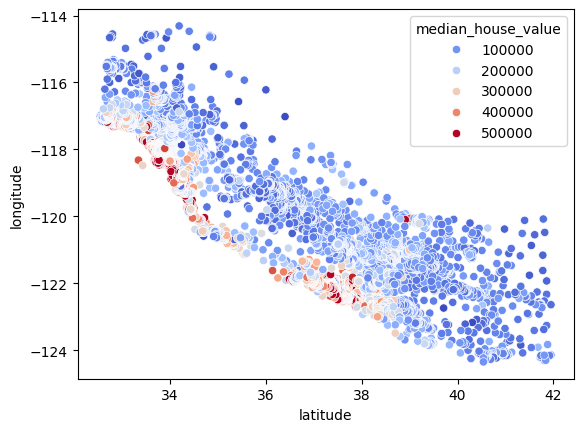

In [7]:
# seaborn proporciona gráficas agradables
import seaborn as sb

sb.scatterplot(x="latitude", y="longitude", data=datos, hue='median_house_value', palette='coolwarm')

<Axes: xlabel='latitude', ylabel='longitude'>

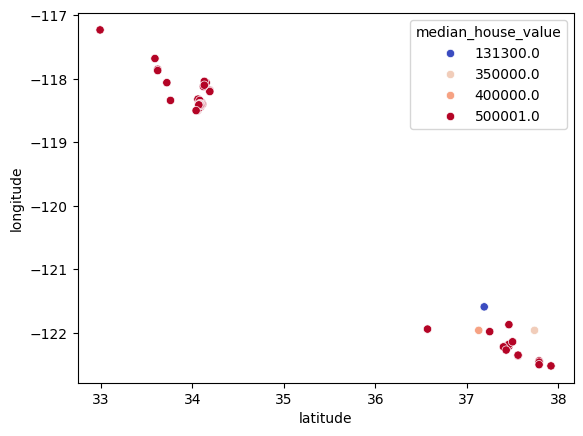

In [8]:
# Filtro: mostrar los datos de la gente que más gana
sb.scatterplot(x="latitude", y="longitude", data=datos[(datos.median_income > 14)], hue='median_house_value', palette='coolwarm')

In [9]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
# Eliminar los datos vacíos.
# Crea un nuevo conjunto de datos pero sin los registros que continen datos vacíos.
datos_na =datos.dropna()
datos_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [11]:
# Convertir la característica ocean_proximity a numérica
# No se puede cambiar simplemente los valores de texto por números,
# ya que se podría entender que 5 vale más que 1.

# Para esto se usan los Dummies o One-Hot Encoding
# 1H OCEAN    NEAR BAY    INLAND    NEAR OCEAN    ISLAND
#     1           0          0          0            0
#     0           1          0          0            0

# El valor seleccionado tendrá 1 y el resto 0, de manera que ninguno vale más que otro.
# pandas tiene un función en la cual se pide la columna de la que se quieren tener dummies.
# dtype especifica que queremos el valor como entero y no como lógico.
dummies = pd.get_dummies(datos_na["ocean_proximity"], dtype=int)

In [12]:
# Agregamos los dummies a los datos
datos_na = datos_na.join(dummies)
datos_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [13]:
# Eliminar ocean_proximity
# axis=1 especifica que ocean_proximity es una columna
datos_na = datos_na.drop(['ocean_proximity'], axis=1)
datos_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [14]:
# Análisis

# Correlaciones
datos_na.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


<Axes: >

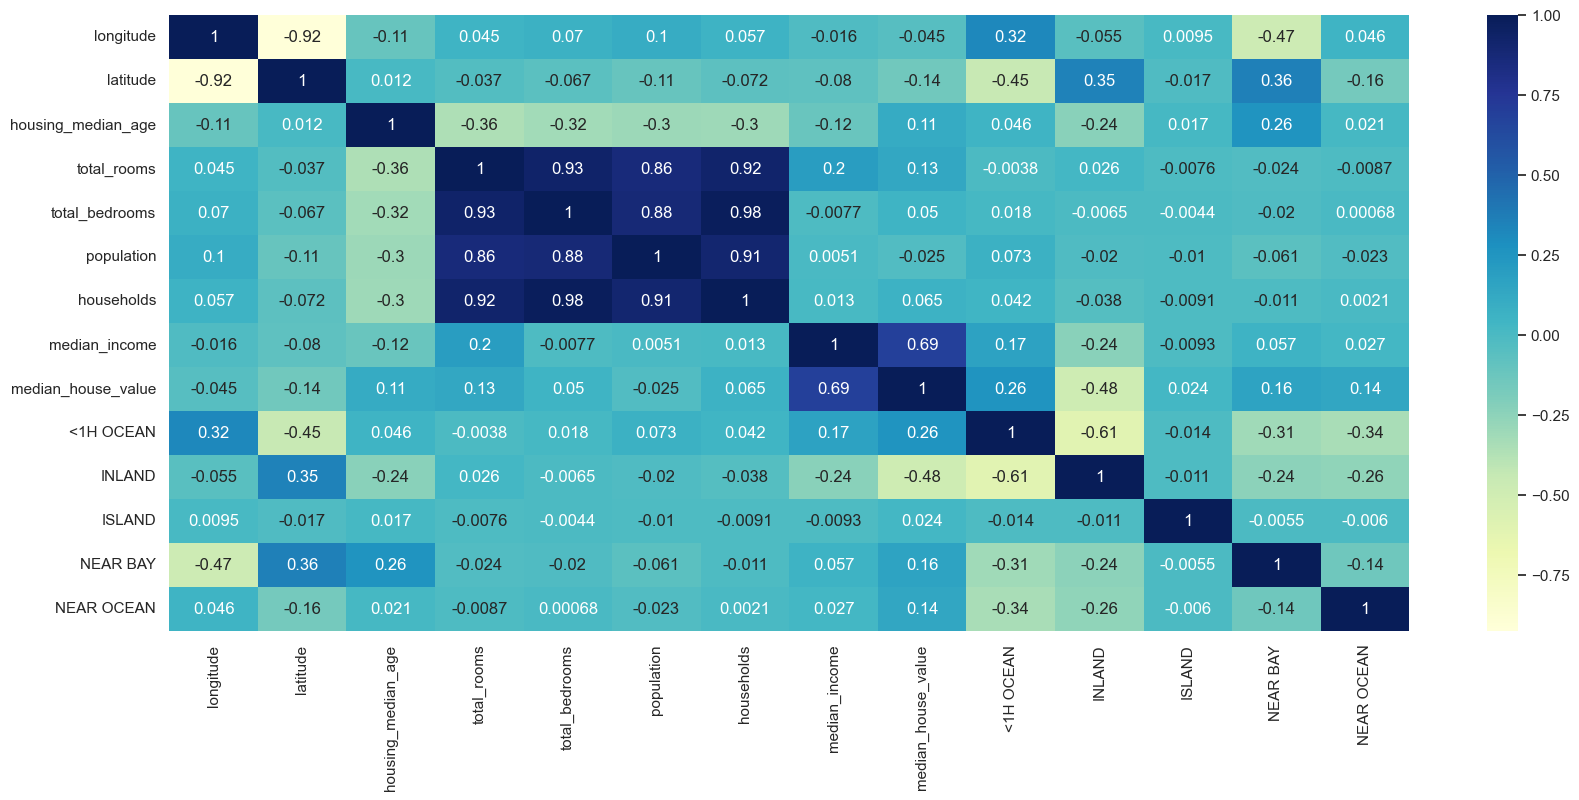

In [15]:
# Cambiar el tamaño del gráfico
sb.set(rc={'figure.figsize':(20,8)})

# cmap establece el color: amarillo,verde,azul
sb.heatmap(datos_na.corr(), annot=True, cmap="YlGnBu")

In [16]:
# Correlación con el precio medio de la casa
datos_na.corr()['median_house_value'].sort_values(ascending=False) 

# Podemos ver que el precio medio de las casa se relaciona principalmente
# con los ingresos

median_house_value    1.000000
median_income         0.688355
<1H OCEAN             0.257614
NEAR BAY              0.160526
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ISLAND                0.023525
population           -0.025300
longitude            -0.045398
latitude             -0.144638
INLAND               -0.484787
Name: median_house_value, dtype: float64

<Axes: xlabel='median_house_value', ylabel='median_income'>

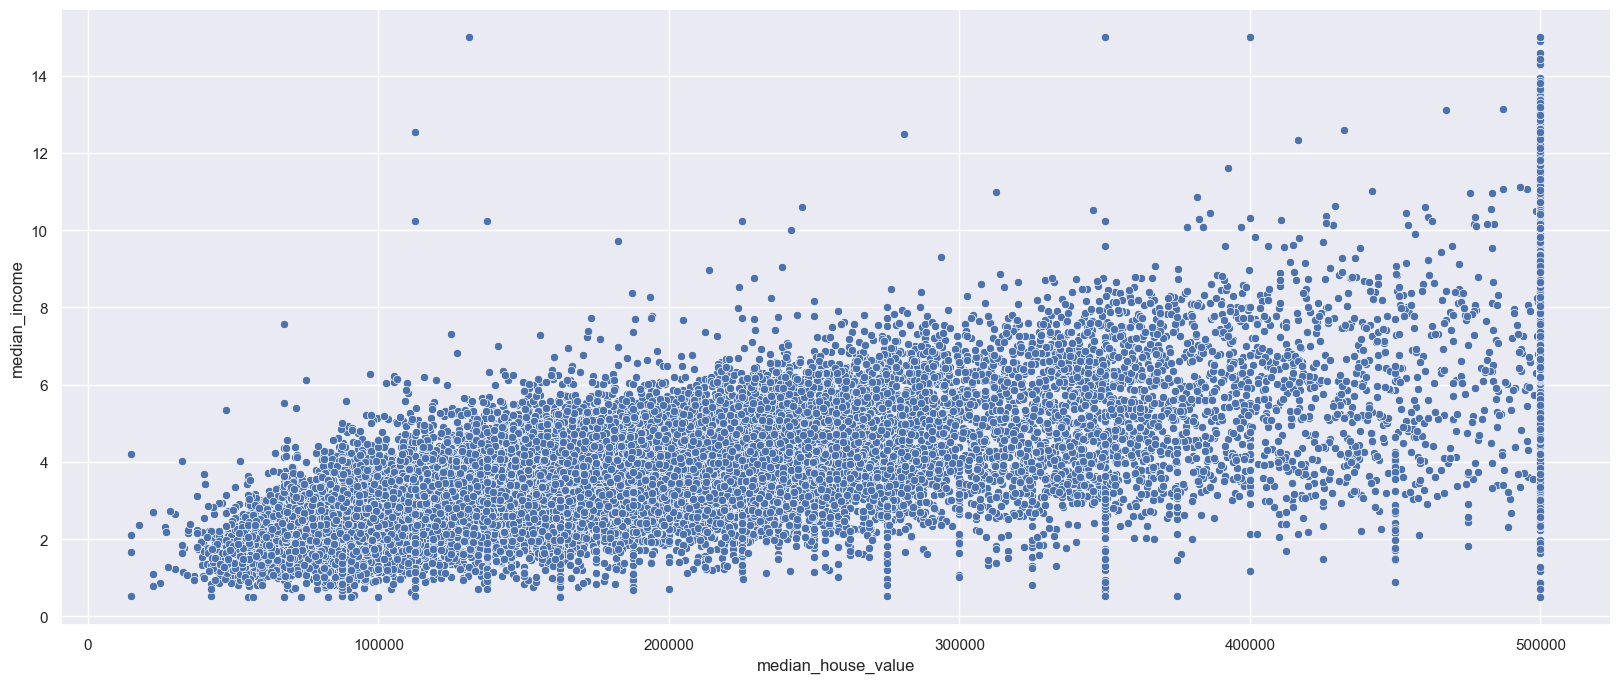

In [17]:
# Gráfica de la realción entre el valor de la casa y los ingresos.
# Se puede ver el problema del valor másximo de las casas, pues incluye 
# todas las que superan el valor.
sb.scatterplot(x=datos_na['median_house_value'], y=datos_na['median_income'])

<Axes: >

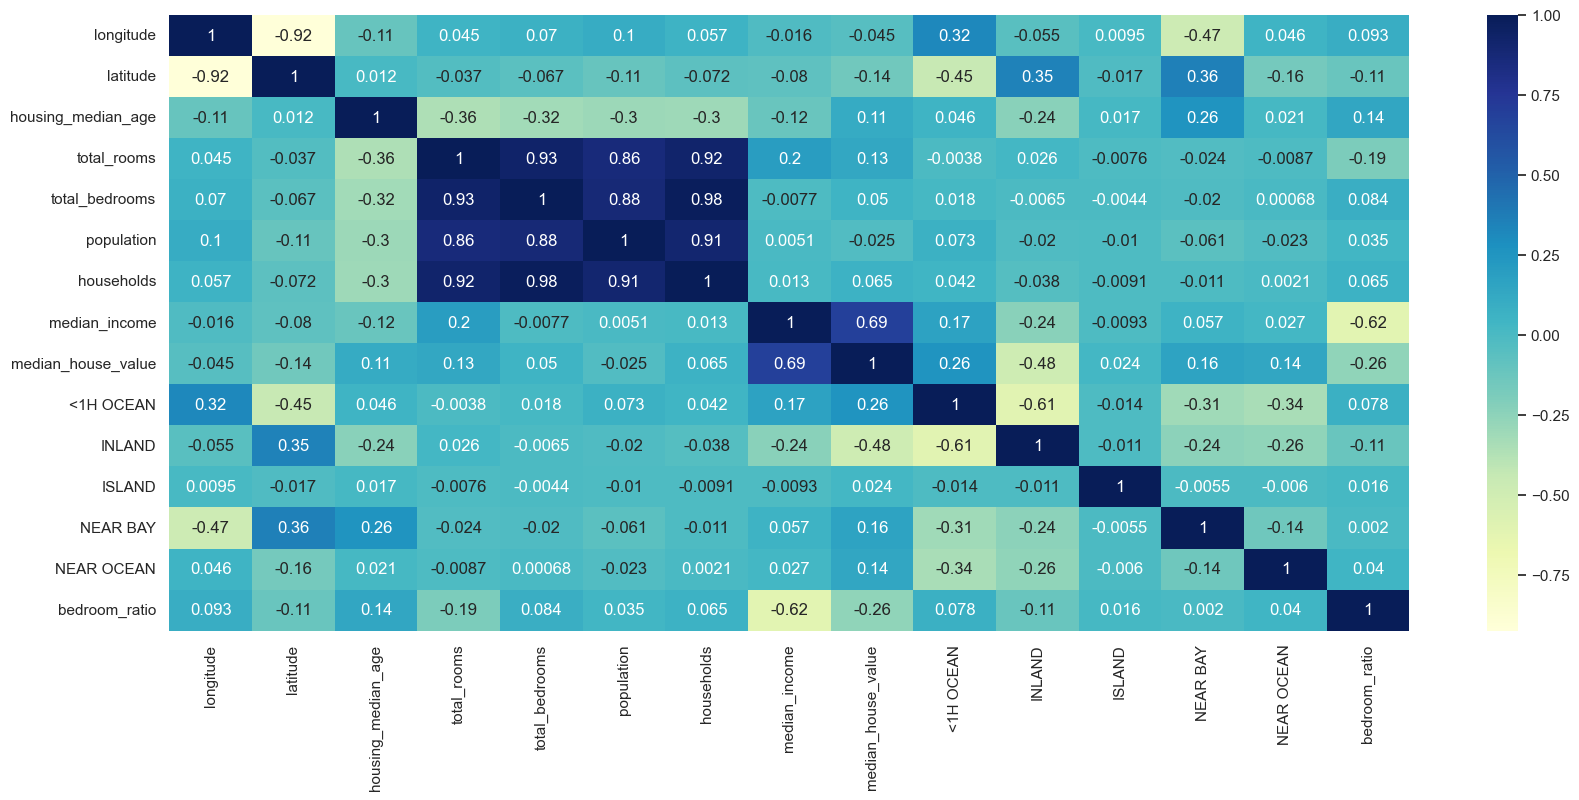

In [19]:
# Agregamos nuevas características: cuántas habitaciones son dormitorio
datos_na['bedroom_ratio'] = datos_na['total_bedrooms'] / datos_na['total_rooms']

sb.set(rc={'figure.figsize':(20,8)})
sb.heatmap(datos_na.corr(), annot=True, cmap="YlGnBu")

In [21]:
# Separar las características de la etiqueta
# Quitamos la columna (axis=1 indica que es una columna)
x = datos_na.drop(['median_house_value'], axis=1)
y = datos_na['median_house_value']

In [24]:
# Separar los datos en 2 partes: un conjunto entrenamiento y uno de pruebas

# train_test_split es una función que separa los datos.
# Devuelve 4 datos
from sklearn.model_selection import train_test_split

# test_size indica cuánto queremos separar para pruebas (.2 = 20%)
x_ent, x_pru, y_ent, y_pru = train_test_split(x,y, test_size=.2)

In [27]:
x_ent.shape
# (16346, 14) registros, columnas

y_ent.shape
# (16346,) 1 sola columna

(16346,)

In [28]:
# Crear el model y entrenarlo con los datos de entrenamiento

from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(x_ent,y_ent)

LinearRegression()

In [29]:
# Hacemos las predicciones
predicciones = modelo.predict(x_pru)

In [30]:
# predicciones devuelve un conjunto de datos
predicciones

array([263440.05334462, 283308.09607801, 257174.90116265, ...,
       271530.75370882, 219250.59295123, 288087.90848132])

In [32]:
comparativa = {"Predicciones": predicciones, "Valor real": y_pru}
pd.DataFrame(comparativa)

,Predicciones,Valor real
15991,263440.053345,357000.0
291,283308.096078,156300.0
1830,257174.901163,212200.0
14320,178033.786885,162500.0
20580,112609.394752,87900.0
...,...,...
7969,232013.453032,152100.0
4878,183696.372177,312500.0
4191,271530.753709,240800.0
997,219250.592951,216800.0


In [33]:
# Overfitting sobreajuste
print(modelo.score(x_ent, y_ent))
print(modelo.score(x_pru,y_pru))

0.6522167584210778
0.6512026526093303


In [34]:
# Error
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_pru, predicciones)

In [35]:
mse

4580383425.480642

In [36]:
# mse es un valor elevado al cuadrado para que sean positivos y las diferencias sean mayores.
# Obtenemos la raíz cuadrada.
rmse = np.sqrt(mse)

In [37]:
# Promedio de fallo
rmse

67678.53001861552

In [38]:
# Scaler Escalamiento
# La diferencia entre los rangos de los datos van desde las habitaciones (1-5) hasta
# los  ingresos (hasta 500.000).
# Scaler mantiene todos los datos en un rango pequeño.
# Solo se escalan las características.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_ent_esc = scaler.fit_transform(x_ent)
x_pru_esc = scaler.fit_transform(x_pru)



In [39]:
x_ent

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
6937,-118.09,34.00,35.0,1580.0,331.0,1290.0,338.0,4.1458,1,0,0,0,0,0.209494
4080,-118.37,34.15,23.0,4604.0,1319.0,2391.0,1227.0,3.1373,1,0,0,0,0,0.286490
19005,-121.93,38.31,25.0,185.0,32.0,85.0,32.0,4.8750,0,1,0,0,0,0.172973
9178,-118.53,34.37,8.0,3839.0,852.0,1342.0,593.0,3.9118,1,0,0,0,0,0.221933
19086,-122.50,38.40,36.0,1860.0,364.0,777.0,339.0,4.1307,1,0,0,0,0,0.195699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16473,-121.26,38.11,8.0,2770.0,642.0,1611.0,633.0,3.1284,0,1,0,0,0,0.231769
9260,-120.07,36.96,32.0,1268.0,283.0,549.0,273.0,1.4511,0,1,0,0,0,0.223186
8597,-118.37,33.88,20.0,2439.0,474.0,1219.0,497.0,5.9619,1,0,0,0,0,0.194342
12056,-117.58,33.87,42.0,765.0,171.0,590.0,177.0,1.6875,0,1,0,0,0,0.223529


In [40]:
pd.DataFrame(x_ent_esc)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.736153,-0.763442,0.504755,-0.485393,-0.491754,-0.119133,-0.423309,0.141289,1.127206,-0.681782,-0.017492,-0.355606,-0.386035,-0.059281
1,0.596613,-0.693147,-0.448865,0.900251,1.849979,0.865160,1.904687,-0.387971,1.127206,-0.681782,-0.017492,-0.355606,-0.386035,1.279459
2,-1.177548,1.256367,-0.289929,-1.124604,-1.200436,-1.196402,-1.224621,0.523972,-0.887149,1.466745,-0.017492,-0.355606,-0.386035,-0.694268
3,0.516875,-0.590048,-1.640891,0.549716,0.743107,-0.072645,0.244451,0.018486,1.127206,-0.681782,-0.017492,-0.355606,-0.386035,0.156999
4,-1.461613,1.298544,0.584223,-0.357093,-0.413538,-0.577754,-0.420690,0.133364,1.127206,-0.681782,-0.017492,-0.355606,-0.386035,-0.299131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,-0.843647,1.162640,-1.640891,0.059883,0.245371,0.167841,0.349198,-0.392642,-0.887149,1.466745,-0.017492,-0.355606,-0.386035,0.328021
16342,-0.250599,0.623712,0.266350,-0.628356,-0.605522,-0.781586,-0.593522,-1.272887,-0.887149,1.466745,-0.017492,-0.355606,-0.386035,0.178791
16343,0.596613,-0.819678,-0.687270,-0.091786,-0.152819,-0.182607,-0.006941,1.094376,1.127206,-0.681782,-0.017492,-0.355606,-0.386035,-0.322724
16344,0.990317,-0.824365,1.061033,-0.858839,-0.870982,-0.744932,-0.844914,-1.148824,-0.887149,1.466745,-0.017492,-0.355606,-0.386035,0.184760
